In [3]:
import pandas as pd
import numpy as np

# Importing Merged data
import_path = r"C:\Users\admin\Desktop\Masters AI\Project A\Week 3"
export_path = r"C:\Users\admin\Desktop\Masters AI\Project A\Week 3"
plots_path = r'C:\Users\admin\Desktop\Masters AI\Project A\Week 3\plots'


file, date_fields = 'wf1.csv', ['date','acq_date']
vars()[file[0:-4]] = pd.read_csv('/'.join([import_path,file[:]]),parse_dates=date_fields)
print(file,' = ',vars()[file[0:-4]].shape)

wf1.csv  =  (1974638, 61)


In [4]:
# Creating array for columns to drop from final set

drop_features1 = ['date','minC_14ave', 'minC_30ave','Snow_cm','sunHour', 'uv_14ave', 'uv_30ave','DewPointC','FeelsLikeC', 'HeatIndexC', 'WindChillC','WindGustKmph',
                   'humidity_14ave','humidity_30ave','precipMM_7ave','precipMM_14ave','precipMM_90ave','pressure', 'tempC', 'visibility',
                   'suburb','region','frp_min','frp_sum','frp_median','frp_mean']

In [5]:
wf1b = wf1.copy()

wf1b['cat'] = 0

# BINARY - frp_MAX 
wf1b['cat'] = np.where(wf1b['frp_max'] < 12, 0, wf1b['cat'])
wf1b['cat'] = np.where(wf1b['frp_max'] >= 12, 1, wf1b['cat'])

print(wf1b.cat.value_counts(),'\n')

wf1b_ed = wf1b.drop(drop_features1, axis = 1) 
# We keep all data
wf1_alb=wf1b_ed

# wf1_alb=wf1b_ed
# -----------------------------------------------------------------
# # Victoria only data
# wf1b_ed_vic = wf1b_ed[wf1b_ed.state_Victoria == 1]
# wf1b_ed_vic = wf1b_ed_vic.drop(states ,axis=1).reset_index(drop=True)
# -----------------------------------------------------------------

# DROP STATES
# wf1b_ed = wf1b_ed.drop(states ,axis=1).reset_index(drop=True)

pd.set_option('display.max_columns', 34)
wf1_alb

0    1909066
1      65572
Name: cat, dtype: int64 



,maxC,maxC_90ave,minC,minC_90ave,uv,uv_90ave,cloudcover,humidity,humidity_90ave,precipMM,precipMM_30ave,windAZI,windKmph,location,acq_date,lat_suburb,long_suburb,...,month_cos,state_Australian Capital Territory,state_New South Wales,state_Northern Territory,state_Queensland,state_South Australia,state_Tasmania,state_Victoria,state_Western Australia,season_summer,season_autumn,season_winter,season_spring,zone_north,zone_south,frp_max,cat
0,19,18.5,14,11.5,4,4.1,55,85,78.2,1.3,0.8,212,16,Albany,2014-11-29,-35.0031,117.86595,...,0.500000,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.0,0
1,21,18.6,12,11.6,5,4.1,29,76,78.3,0.0,0.8,117,10,Albany,2014-11-30,-35.0031,117.86595,...,0.500000,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.0,0
2,20,18.6,14,11.6,4,4.2,71,80,78.3,1.4,0.8,167,17,Albany,2014-12-01,-35.0031,117.86595,...,0.866025,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0
3,17,18.6,12,11.7,4,4.2,47,70,78.3,0.2,0.8,123,18,Albany,2014-12-02,-35.0031,117.86595,...,0.866025,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0
4,24,18.7,12,11.7,5,4.2,31,72,78.3,0.0,0.8,129,15,Albany,2014-12-03,-35.0031,117.86595,...,0.866025,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974633,28,17.2,15,8.9,6,3.7,6,64,80.7,0.0,4.8,189,7,Young,2020-11-26,-34.3135,148.30107,...,0.500000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0
1974634,29,17.4,15,9.1,7,3.8,4,66,80.5,0.0,4.3,166,6,Young,2020-11-27,-34.3135,148.30107,...,0.500000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0
1974635,28,17.5,20,9.2,7,3.8,25,61,80.3,0.8,3.8,192,6,Young,2020-11-28,-34.3135,148.30107,...,0.500000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0
1974636,25,17.7,20,9.4,5,3.8,61,69,80.1,8.4,3.6,169,12,Young,2020-11-29,-34.3135,148.30107,...,0.500000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0


In [7]:
print(wf1_alb.cat.value_counts(),'\n')

0    1909066
1      65572
Name: cat, dtype: int64 



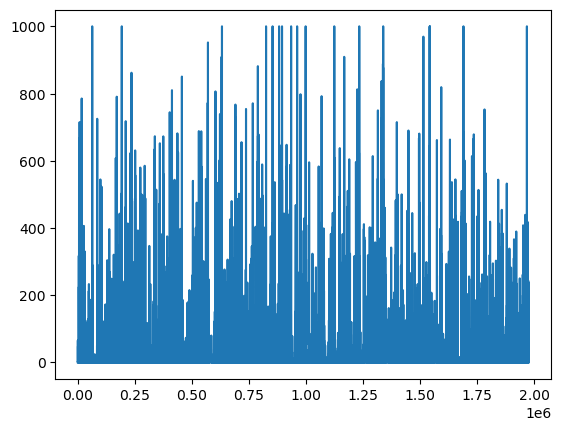

In [8]:
from matplotlib import pyplot as plt

wf1_alb['frp_max']

plt.plot(wf1_alb['frp_max'])
plt.show()


In [9]:
from matplotlib import pyplot

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
target=wf1_alb['cat']
dataset = wf1_alb.drop(['location','frp_max','cat'], axis = 1)
dataset.set_index('acq_date', inplace=True)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,31] = encoder.fit_transform(values[:,31])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

# pd.set_option('display.max_columns', 66)
# reframed

# print(reframed['var30(t-1)'].value_counts(),'\n')
print(target.value_counts(),'\n')

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.431373   0.362924   0.500000   0.404834   0.333333   0.378378   
2   0.470588   0.365535   0.458333   0.407855   0.444444   0.378378   
3   0.450980   0.365535   0.500000   0.407855   0.333333   0.391892   
4   0.392157   0.365535   0.458333   0.410876   0.333333   0.391892   
5   0.529412   0.368146   0.458333   0.410876   0.444444   0.391892   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1       0.55   0.843750   0.842365    0.002117    0.022472    0.589385   
2       0.29   0.750000   0.843596    0.000000    0.022472    0.324022   
3       0.71   0.791667   0.843596    0.002280    0.022472    0.463687   
4       0.47   0.687500   0.843596    0.000326    0.022472    0.340782   
5       0.31   0.708333   0.843596    0.000000    0.022472    0.357542   

   var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)  var17(t-1)  ...  var16(t)  \
1    0.159574    0.263431    0.105289         0.

In [10]:
# split into train and test sets
values = reframed.values
n_train_hours = round(0.7*len(values))
print(n_train_hours)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train, target[:n_train_hours]
test_X, test_y = test, target[n_train_hours+1:]

print(test_X.shape[1])

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
train_y[1000:1462]

1382246
64
(1382246, 1, 64) (1382246,) (592391, 1, 64) (592391,)


1000    0
1001    0
1002    1
1003    0
1004    0
       ..
1457    0
1458    0
1459    0
1460    0
1461    0
Name: cat, Length: 462, dtype: int64

In [11]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(train_y),
#                                                  train_y)

# print(class_weights)

class_weight = {0 : 0.517 ,1: 14.744}



Epoch 1/50
19198/19198 - 88s - loss: 0.4916 - acc: 0.8031 - val_loss: 0.1587 - val_acc: 0.9581
Epoch 2/50
19198/19198 - 81s - loss: 0.4600 - acc: 0.8132 - val_loss: 0.1687 - val_acc: 0.9512
Epoch 3/50
19198/19198 - 82s - loss: 0.4486 - acc: 0.8129 - val_loss: 0.1797 - val_acc: 0.9471
Epoch 4/50
19198/19198 - 82s - loss: 0.4404 - acc: 0.8140 - val_loss: 0.1786 - val_acc: 0.9482
Epoch 5/50
19198/19198 - 47s - loss: 0.4376 - acc: 0.8186 - val_loss: 0.1826 - val_acc: 0.9462
Epoch 6/50
19198/19198 - 52s - loss: 0.4351 - acc: 0.8188 - val_loss: 0.1888 - val_acc: 0.9417
Epoch 7/50
19198/19198 - 47s - loss: 0.4325 - acc: 0.8189 - val_loss: 0.1893 - val_acc: 0.9407
Epoch 8/50
19198/19198 - 56s - loss: 0.4263 - acc: 0.8221 - val_loss: 0.2023 - val_acc: 0.9319
Epoch 9/50
19198/19198 - 48s - loss: 0.4225 - acc: 0.8238 - val_loss: 0.1998 - val_acc: 0.9354
Epoch 10/50
19198/19198 - 52s - loss: 0.4216 - acc: 0.8262 - val_loss: 0.2070 - val_acc: 0.9306
Epoch 11/50
19198/19198 - 47s - loss: 0.4199 - ac

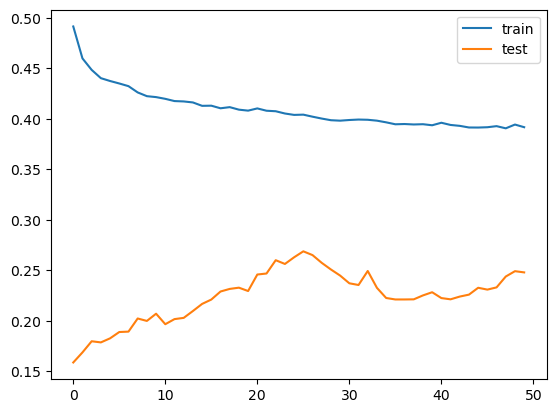

In [12]:
# design network
model = Sequential()
model.add(LSTM(units=50,input_shape=[train_X.shape[1], train_X.shape[2]]))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72,class_weight=class_weight, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
pred_y = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, zero_one_loss, f1_score, recall_score

# print(yhat.shape)
# print(test_X[:, 1:])

# from sklearn.metrics import mean_squared_error
# mean_squared_error(inv_y, inv_yhat)

# print(yhat)

# print(test_y.value_counts(),'\n')

model.predict(test_X)

print(pred_y)

pred_cls=[]
for i, predicted in enumerate(pred_y):
    x=0
    if predicted[0] > 0.8:
        x= 1
    else:
        x= 0
    pred_cls.append(x)


        #assign i to class 0

# scores = model.evaluate(test_X, test_y, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

# print(scores)

#MEASURES
cm = confusion_matrix(test_y, pred_cls)
print(cm)
cr = classification_report(test_y, pred_cls)

print(cr)
# acs = accuracy_score(test_y, pred_y)
# error = zero_one_loss(test_y, pred_y)
# f1 = f1_score(test_y, pred_y, average='weighted')
# recall = recall_score(test_y, pred_y, average='weighted')
# pred_y.argsort()[-3:][::-1]

# np.argmax(pred_y, axis=0)

# pred_y[16]
#np.argmax(test_y, axis=0)


# test_y[1659]
# max(pred_y)

# max(test_y)

# sorted_index_array = np.argsort(pred_y)
# sorted_array = pred_y[sorted_index_array]
# n = 10

# rslt = sorted_array[-n : ]
# print("{} largest value:".format(n),
#       rslt[0])

#print(pred_cls)


[[0.2082003 ]
 [0.18694916]
 [0.19645917]
 ...
 [0.09045488]
 [0.05978307]
 [0.03796354]]
[[521446  52246]
 [ 10315   8384]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94    573692
           1       0.14      0.45      0.21     18699

    accuracy                           0.89    592391
   macro avg       0.56      0.68      0.58    592391
weighted avg       0.95      0.89      0.92    592391



In [18]:
pred_cls=[]
for i, predicted in enumerate(pred_y):
    x=0
    if predicted[0] > 0.3:
        x= 1
    else:
        x= 0
    pred_cls.append(x)


        #assign i to class 0

# scores = model.evaluate(test_X, test_y, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

# print(scores)

#MEASURES
cm = confusion_matrix(test_y, pred_cls)
print(cm)
cr = classification_report(test_y, pred_cls)

print(cr)


[[482760  90932]
 [  7594  11105]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91    573692
           1       0.11      0.59      0.18     18699

    accuracy                           0.83    592391
   macro avg       0.55      0.72      0.55    592391
weighted avg       0.96      0.83      0.88    592391

